# Exploratory Data Analysis (EDA)

In [1]:
# Load library
import pandas as pd
import re
import string

In [2]:
# Load goodreads datasets
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
book_tags = pd.read_csv('book_tags.csv')
tags = pd.read_csv('tags.csv')

# Load book crossing datasets
# Define column names
book_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
bx_books = pd.read_csv('BX_Books.csv', sep=';', names=book_cols, encoding='latin-1', low_memory=False, skiprows=1)
rating_cols = ['user_id', 'isbn', 'rating']
bx_ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', names=rating_cols, encoding='latin-1', low_memory=False, skiprows=1)
user_cols = ['user_id', 'location', 'age']
bx_users = pd.read_csv('BX-Users.csv', sep=';', names=user_cols, encoding='latin-1', low_memory=False, skiprows=1)

In [3]:
# Remove missing values
books.dropna(inplace=True)
ratings.dropna(inplace=True)
book_tags.dropna(inplace=True)
tags.dropna(inplace=True)
bx_books.dropna(inplace=True)
bx_ratings.dropna(inplace=True)
bx_users.dropna(inplace=True)

# Remove duplicates
books.drop_duplicates(subset='original_title', keep=False, inplace=True)
ratings = ratings.sort_values("user_id")
ratings.drop_duplicates(subset =["user_id", "book_id"], keep = False, inplace = True)
book_tags.drop_duplicates(subset=['tag_id', 'goodreads_book_id'], keep=False, inplace=True)
tags.drop_duplicates(subset='tag_id', keep=False, inplace=True)
bx_books.drop_duplicates(subset='book_title', keep=False,inplace=True)
bx_ratings.drop_duplicates(subset =["user_id", "isbn"], keep = False, inplace = True)
bx_users.drop_duplicates(inplace=True)

# Standardize text fields
books['title'] = books['title'].str.title()
books['authors'] = books['authors'].str.title()

bx_books['book_title'] = bx_books['book_title'].str.title()
bx_books['book_author'] = bx_books['book_author'].str.title()

In [4]:
# View columns
print(books.columns)

print(bx_books.columns)

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')
Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_s', 'img_m', 'img_l'],
      dtype='object')


In [5]:
# Drop unnecessary columns
books_data = books.drop(columns=['book_id', 'best_book_id', 'work_id', 'isbn13', 
                                 'title','work_ratings_count', 
                                 'work_text_reviews_count', 'ratings_1', 'ratings_2',
                                 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
                                 'small_image_url'])

bx_books = bx_books.drop(columns=['img_s', 'img_m', 'img_l'])

In [6]:
# Replace JK Rowling name
books['authors'] = books['authors'].replace('J.K. Rowling, Mary Grandpré', 'J.K. Rowling')
books['authors'] = books['authors'].replace('J.K. Rowling, Mary Grandpré, Rufus Beck', 'J.K. Rowling')

In [7]:
# Verifty change
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,J.K. Rowling,1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...


In [8]:
# Define function to clean text
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).title()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [9]:
# Clean book titles
bx_books['book_title'] = bx_books['book_title'].apply(lambda x:clean_text(x))

# Visualizations

In [10]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns

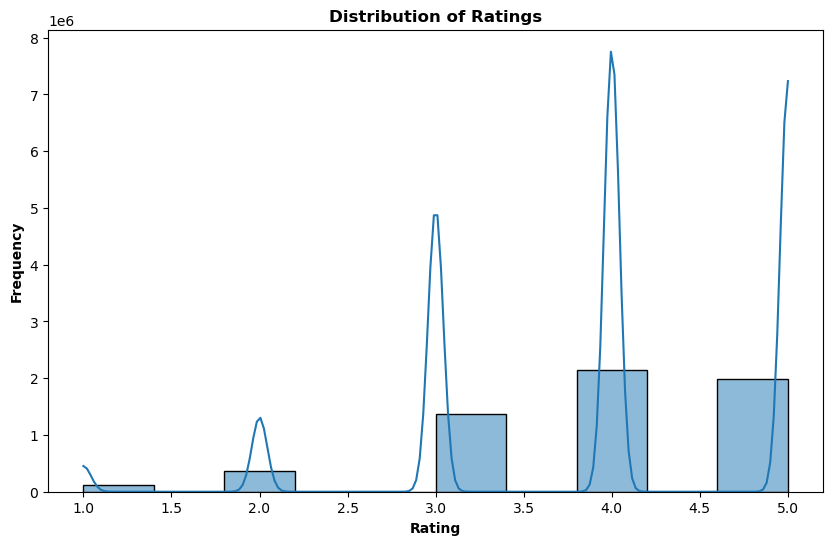

In [11]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings', weight='bold')
plt.xlabel('Rating', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.show()

**Insight:**

**User Sentiment:** This visualization shows the overall distribution of user ratings. A higher concentration of ratings towards the higher end (e.g., 4 or 5 stars) indicates generally positive user sentiment towards the books in the dataset. Conversely, a higher concentration towards the lower end would suggest dissatisfaction.

**Quality Assessment:** By looking at the spread, you can assess the perceived quality of books in the dataset. If the ratings are normally distributed, it suggests a balanced perception, whereas skewness towards higher ratings could indicate a large number of high-quality books.

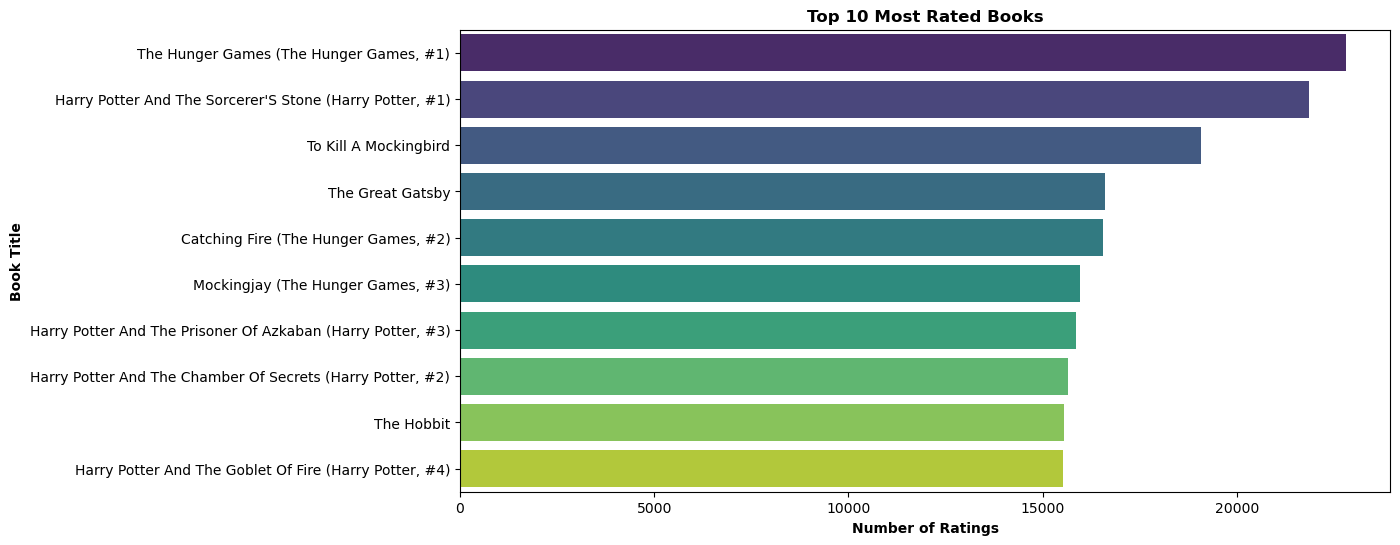

In [12]:
# Merge books and ratings datasets
merged = pd.merge(ratings, books, on='book_id')

# Calculate the number of ratings for each book
top_books = merged['title'].value_counts().head(10)

# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_books.values, y=top_books.index, palette='viridis')
plt.title('Top 10 Most Rated Books', weight='bold')
plt.xlabel('Number of Ratings', weight='bold')
plt.ylabel('Book Title', weight='bold')
plt.show()

**Insight:**

**Popularity:** This visualization highlights the most popular books based on the number of ratings they received. Popular books are more likely to be known by a larger audience and can be used to identify trends in reading preferences.

**Engagement:** High engagement with these books suggests that they are widely read and discussed. This can inform recommendations by suggesting these popular books to new users or those with similar tastes.

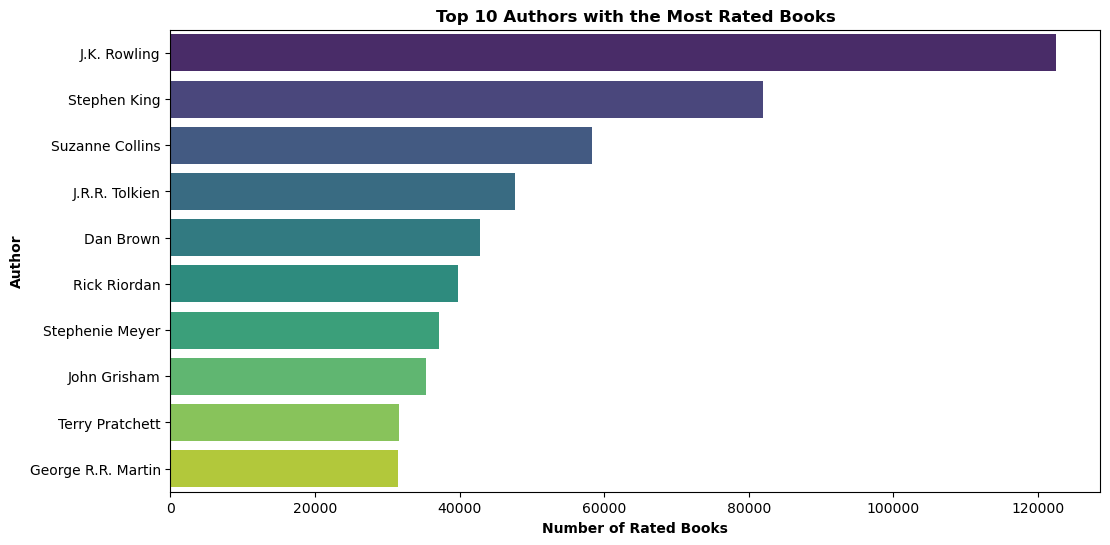

In [13]:
# Calculate the number of rated books for each author
authors_rated_books = merged.groupby('authors')['book_id'].count().sort_values(ascending=False).head(10)

# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(x=authors_rated_books.values, y=authors_rated_books.index, palette='viridis')
plt.title('Top 10 Authors with the Most Rated Books', weight='bold')
plt.xlabel('Number of Rated Books', weight='bold')
plt.ylabel('Author', weight='bold')
plt.show()

**Insight:**

The visualization shows that J.K. Rowling, Stephen King, and Suzanne Collins are the most popular authors based on the number of rated books. This highlights the strong preference for fantasy and supernatural genres among readers. Leveraging the popularity of these authors can enhance recommendation systems by suggesting their works to new users or those with similar interests, thereby increasing user engagement and satisfaction.

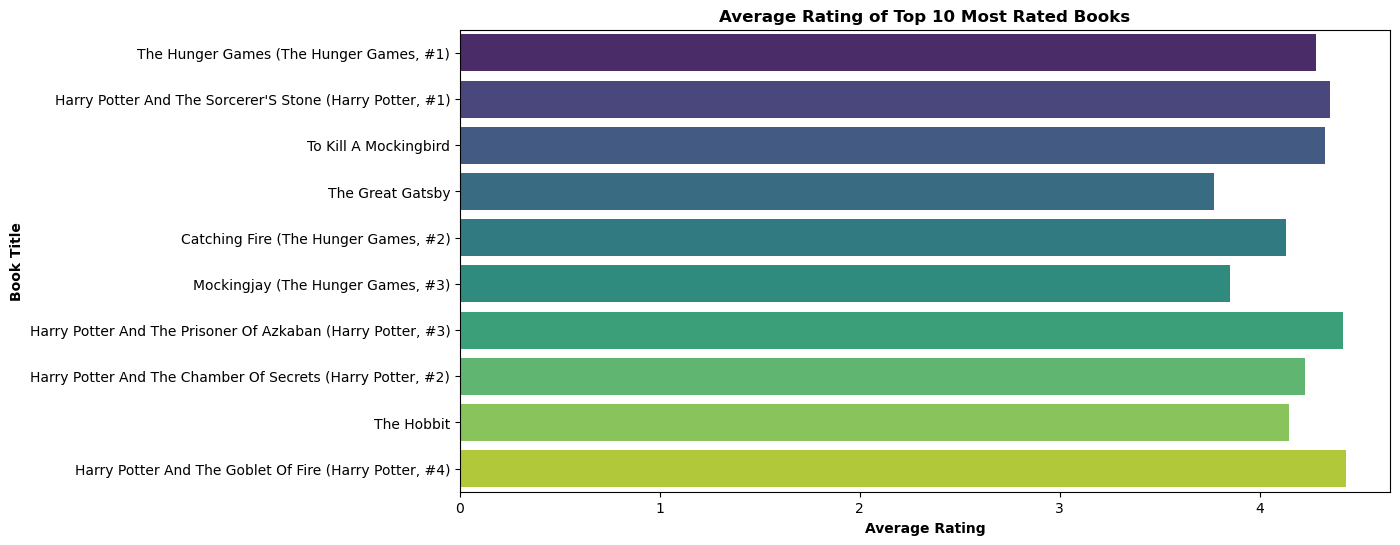

In [14]:
# Calculate the avg rating for top 10 most rated books
top_books_avg_rating = merged.groupby('title')['rating'].mean().loc[top_books.index]

# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_books_avg_rating.values, y=top_books_avg_rating.index, palette='viridis')
plt.title('Average Rating of Top 10 Most Rated Books', weight='bold')
plt.xlabel('Average Rating', weight='bold')
plt.ylabel('Book Title', weight='bold')
plt.show()

**Insight:**

**Quality vs. Popularity:** By comparing the average ratings of the most rated books, you can determine whether the most popular books are also highly rated. This can help identify books that are not only popular but also well-regarded by readers.

**Reader Satisfaction:** Books with high average ratings indicate high reader satisfaction, suggesting that these books meet or exceed reader expectations.

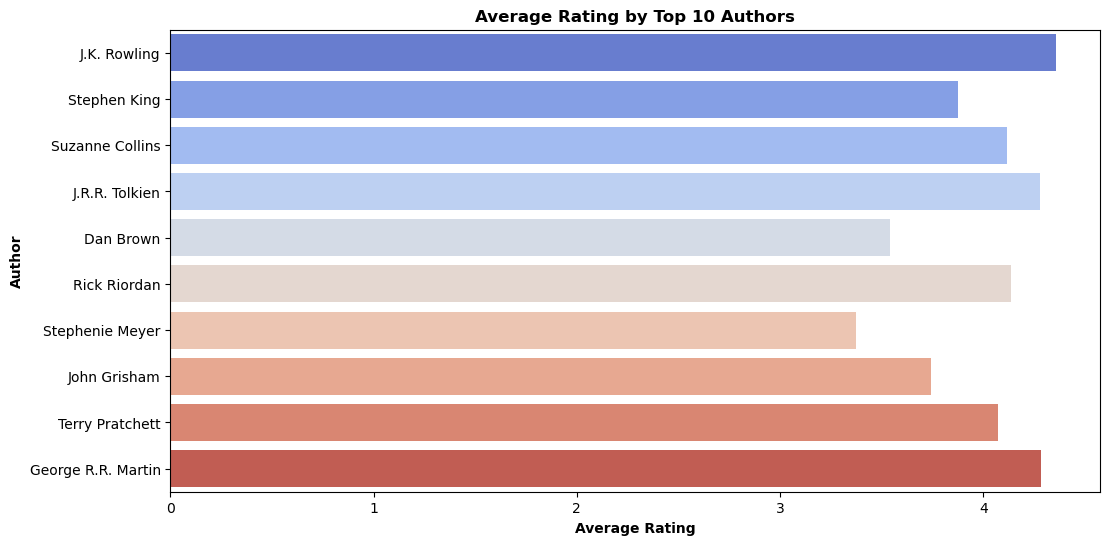

In [15]:
# Calculate the # of ratings for each author
top_authors = merged['authors'].value_counts().head(10)

# Calculate the avg rating for each author
top_authors_avg_rating = merged.groupby('authors')['rating'].mean().loc[top_authors.index]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors_avg_rating.values, y=top_authors_avg_rating.index, palette='coolwarm')
plt.title('Average Rating by Top 10 Authors', weight='bold')
plt.xlabel('Average Rating', weight='bold')
plt.ylabel('Author', weight='bold')
plt.show()

**Insight:**

**Author Reputation:** By examining the average ratings of books by the top authors, you can gauge the overall reputation and quality of these authors' works. Authors with consistently high ratings are likely well-regarded and trusted by readers.

**Recommendation Basis:** Authors with high average ratings can be a basis for recommendations, suggesting their books to users who have enjoyed similar authors.

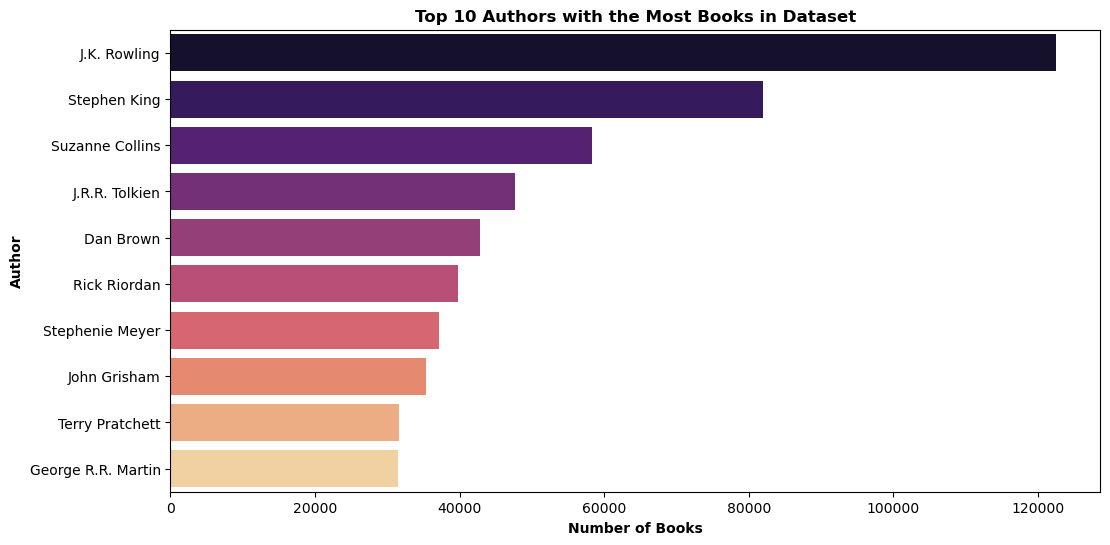

In [16]:
# Calculate the number of books for each author
top_authors = merged['authors'].value_counts().head(10)

# Plot the top 10 authors with the most books
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='magma')
plt.title('Top 10 Authors with the Most Books in Dataset', weight='bold')
plt.xlabel('Number of Books', weight='bold')
plt.ylabel('Author', weight='bold')
plt.show()

**Insight:**

**Prolific Authors:** This visualization shows the most prolific authors in the dataset, i.e., those who have authored the most books. These authors are likely to have a significant influence on the dataset and reader preferences.

**Diversity of Works:** Authors with many books might have a diverse range of works, appealing to various reader tastes. This can be useful in creating diverse recommendation lists.

# Content Based Recommendation

In [17]:
content_data = books[['original_title','authors','average_rating']]
content_data = content_data.astype(str)

In [18]:
content_data['content'] = content_data['original_title'] + ' ' + content_data['authors'] + ' ' + content_data['average_rating']

In [19]:
content_data = content_data.reset_index()
indices = pd.Series(content_data.index, index=content_data['original_title'])

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [21]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(content_data['authors'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7661, 5253)

In [22]:
cosine_sim_author = linear_kernel(tfidf_matrix, tfidf_matrix)

In [23]:
def get_recommendations_books(title, cosine_sim=cosine_sim_author):
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim_author[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return list(content_data['original_title'].iloc[book_indices])

In [24]:
def author_book_shows(book):
    for book in book:
        print(book)

In [25]:
books1 = get_recommendations_books('A Court of Thorns and Roses', cosine_sim_author)
author_book_shows(books1)

Crown of Midnight
A Court of Thorns and Roses
Heir of Fire
Queen of Shadows
Empire of Storms
The Assassin's Blade
A Court of Wings and Ruin
Just Listen
The Truth About Forever
This Lullaby


In [26]:
books2 =get_recommendations_books('Harry Potter and the Prisoner of Azkaban', cosine_sim_author)
author_book_shows(books2)

Harry Potter and the Prisoner of Azkaban
Harry Potter and the Order of the Phoenix
Harry Potter and the Chamber of Secrets
Harry Potter and the Goblet of Fire
Harry Potter and the Deathly Hallows
Harry Potter and the Half-Blood Prince
The Casual Vacancy
The Tales of Beedle the Bard
Complete Harry Potter Boxed Set
Harry Potter Boxed Set Books 1-4


In [27]:
books3 = get_recommendations_books('The Hobbit', cosine_sim_author)
author_book_shows(books3)

The Hobbit or There and Back Again
 The Fellowship of the Ring
The Two Towers
The Return of the King
The Lord of the Rings
The Hobbit and The Lord of the Rings
The 7 Habits Of Highly Effective Teens
The Children of Húrin
Entwined
The Silmarillion


# Content-Based Filtering on Multiple Matrices

In [28]:
import re
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [29]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(content_data['content'])

cosine_sim_content = cosine_similarity(count_matrix, count_matrix)

In [30]:
def get_recommendations(title, cosine_sim=cosine_sim_content):
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim_content[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return list(content_data['original_title'].iloc[book_indices])

In [31]:
def book_shows(book):
    for book in book:
        print(book)

In [32]:
books4 = get_recommendations('Pride and Prejudice', cosine_sim_content)
book_shows(books4)

Pride and Prejudice and Zombies
Dawn of the Dreadfuls (Pride and Prejudice and Zombies, #0.5)
Emma
Northanger Abbey
The Jane Austen Book Club
Lady Susan
Sense and Sensibility
Persuasion
Mansfield Park
Exile 


In [33]:
books5 = get_recommendations('Mary Poppins', cosine_sim_content)
book_shows(books5)

Mary, Mary
Savannah Breeze
Children of God
Stiff: The Curious Lives of Human Cadavers
Lit
Moonlight Becomes You
City of Masks
The Good Girl
The Sparrow
Pretty Baby


# Calculate Metrics

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [35]:
# Load datasets
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')

# Preprocess datasets as described in your notebook
books.dropna(inplace=True)
ratings.dropna(inplace=True)
books.drop_duplicates(subset='original_title', keep=False, inplace=True)
ratings = ratings.sort_values("user_id")
ratings.drop_duplicates(subset=["user_id", "book_id"], keep=False, inplace=True)

# Merge ratings with book information
ratings = ratings.merge(books[['book_id', 'original_title']], on='book_id')

In [36]:
# Split data into training and testing sets
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

In [37]:
# Create the content-based recommendation model using 'title' and 'authors'
books['content'] = books['title'] + ' ' + books['authors']
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(books['content'])
cosine_sim_content = cosine_similarity(count_matrix, count_matrix)
indices = pd.Series(books.index, index=books['original_title']).drop_duplicates()

In [38]:
def get_recommendations(title, cosine_sim=cosine_sim_content):
    if title not in indices:
        return []
    idx = indices[title]
    if idx >= cosine_sim.shape[0]:
        return []
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    book_indices = [i[0] for i in sim_scores if i[0] < cosine_sim.shape[0]]
    return list(books['original_title'].iloc[book_indices])

In [39]:
# Generate recommendations for users in the test set
def generate_recommendations(user_id, top_n=10):
    user_data = train_data[train_data['user_id'] == user_id]
    if user_data.empty:
        return []
    user_books = user_data['original_title'].tolist()
    recommendations = []
    for book in user_books:
        recommendations.extend(get_recommendations(book))
    return list(set(recommendations))[:top_n]

In [40]:
# Calculate precision, recall, F1-score, and MAP
def evaluate_model(test_data, top_n=10, sample_size=100):
    y_true = []
    y_pred = []

    # Sample a subset of users for evaluation
    users = test_data['user_id'].unique()
    if len(users) > sample_size:
        users = np.random.choice(users, sample_size, replace=False)

    for user_id in users:
        actual_books = test_data[test_data['user_id'] == user_id]['original_title'].tolist()
        recommended_books = generate_recommendations(user_id, top_n=top_n)
        
        y_true.append(set(actual_books))
        y_pred.append(set(recommended_books))
    
    # Calculate precision, recall, F1-score, and MAP
    precision = np.mean([len(y_true[i] & y_pred[i]) / len(y_pred[i]) if y_pred[i] else 0 for i in range(len(y_true))])
    recall = np.mean([len(y_true[i] & y_pred[i]) / len(y_true[i]) if y_true[i] else 0 for i in range(len(y_true))])
    f1 = np.mean([2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0 for i in range(len(y_true))])
    map_score = np.mean([average_precision_score([int(book in y_true[i]) for book in y_pred[i]], [1] * len(y_pred[i])) for i in range(len(y_true))])

    return precision, recall, f1, map_score

In [41]:
# Evaluate the model
precision, recall, f1, map_score = evaluate_model(test_data, top_n=10, sample_size=100)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'MAP: {map_score}')

Precision: 0.01
Recall: 0.004484308546188059
F1-Score: 0.006191953909140148
MAP: nan


/Users/feyranokham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
/Users/feyranokham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
/Users/feyranokham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
/Users/feyranokham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
/Users/feyranokham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
/Users/feyranokham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide